## E-Commerce Fraud Detection

### Introduction

### Import the libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

### Load the dataset

In [2]:
# load the dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/Venkatalakshmikottapalli/E-commerce-Fraud-Detection/refs/heads/main/data/raw_data/delivery_related.csv')

# print the head of the data
df.head()

,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,AddressChangeDate,DeliveryDate,ReplacementDate,IsProductConsumable,IsOneTimeUseProduct,IsOfferCodeApplied,Fraud
0,47019,41601,41601,yes,no,yes,yes,2711,2711,25/01/2019,20/11/2018,28/01/2019,01/02/2019,yes,no,no,normal
1,20242,30352,30352,no,yes,no,no,2713,2710,06/02/2019,03/02/2019,10/02/2019,17/02/2019,yes,yes,no,normal
2,79619,12328,12328,yes,no,yes,yes,4146,4142,12/01/2019,30/07/2018,22/01/2019,01/02/2019,yes,no,yes,suspicious
3,80669,19203,19203,yes,no,yes,no,2709,2707,27/03/2019,14/06/2018,03/04/2019,06/04/2019,yes,no,yes,normal
4,64577,19842,19842,no,no,no,yes,8815,8811,17/01/2019,26/11/2018,21/01/2019,28/01/2019,yes,no,yes,normal


### Data Summary

- CustId:
  Represents the unique identifier for the customer.
Datatype: Integer

- OrderId:
Represents the unique identifier for the order placed.
Datatype: Integer

- ProductId:
Represents the unique identifier for the product purchased.
Datatype: Integer

- IsValidAddress:
Indicates if the address provided for delivery is valid (yes or no).
Datatype: String (Categorical)

- IsAddchangeRecently:
Indicates if the address was changed recently before the order (yes or no).
Datatype: String (Categorical)

- IsAddchangeonDel:
Indicates if the address was changed during delivery (yes or no).
Datatype: String (Categorical)

- IsDeliveryRejected:
Indicates if the delivery was rejected by the customer (yes or no).
Datatype: String (Categorical)

- OriginalPrice:
The original price of the product before any discounts or offers.
Datatype: Float or Integer

- PaidPrice:
The actual price paid by the customer after applying discounts or offers.
Datatype: Float or Integer

- OrderDate:
The date when the order was placed.
Datatype: Date (String/Datetime)

- AddressChangeDate:
The date when the address was changed.
Datatype: Date (String/Datetime)

- DeliveryDate:
The date when the product was delivered to the customer.
Datatype: Date (String/Datetime)

- ReplacementDate:
The date when a replacement was processed, if applicable.
Datatype: Date (String/Datetime)

- IsProductConsumable:
Indicates if the product is consumable (e.g., food, medicine) (yes or no).
Datatype: String (Categorical)

- IsOneTimeUseProduct:
Indicates if the product is for one-time use only (yes or no).
Datatype: String (Categorical)

- IsOfferCodeApplied:
Indicates if an offer code or discount was applied to the order (yes or no).
Datatype: String (Categorical)

- Fraud:
Label indicating if the transaction is fraudulent (normal or suspicious).
Datatype: String (Categorical)

### Data Inspection

In [3]:
# shape of dataset
df.shape

(100000, 17)

In [4]:
# Columns of dataset
df.columns

Index(['CustId', 'OrderId', 'ProductId', 'IsValidAddress',
       'IsAddchangeRecently', 'IsAddchangeonDel', 'IsDeliveryRejected',
       'OriginalPrice', 'PaidPrice', 'OrderDate', 'AddressChangeDate',
       'DeliveryDate', 'ReplacementDate', 'IsProductConsumable',
       'IsOneTimeUseProduct', 'IsOfferCodeApplied', 'Fraud'],
      dtype='object')

In [5]:
# Index
df.index

RangeIndex(start=0, stop=100000, step=1)

In [6]:
#sum of duplicates
df.duplicated().sum()

0

In [7]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   CustId               100000 non-null  int64 
 1   OrderId              100000 non-null  int64 
 2   ProductId            100000 non-null  int64 
 3   IsValidAddress       100000 non-null  object
 4   IsAddchangeRecently  100000 non-null  object
 5   IsAddchangeonDel     100000 non-null  object
 6   IsDeliveryRejected   100000 non-null  object
 7   OriginalPrice        100000 non-null  int64 
 8   PaidPrice            100000 non-null  int64 
 9   OrderDate            100000 non-null  object
 10  AddressChangeDate    100000 non-null  object
 11  DeliveryDate         100000 non-null  object
 12  ReplacementDate      100000 non-null  object
 13  IsProductConsumable  100000 non-null  object
 14  IsOneTimeUseProduct  100000 non-null  object
 15  IsOfferCodeApplied   100000 non-nul

### Exploratory Data Analysis

In [8]:
# Get churn statistics
df['Fraud'].describe()

count     100000
unique         3
top       normal
freq       70000
Name: Fraud, dtype: object

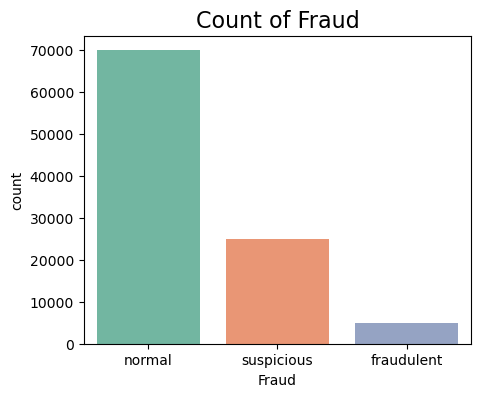

In [9]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Fraud', data=df, hue='Fraud', palette='Set2', legend=False)
plt.title('Count of Fraud', fontsize=16)
plt.show()

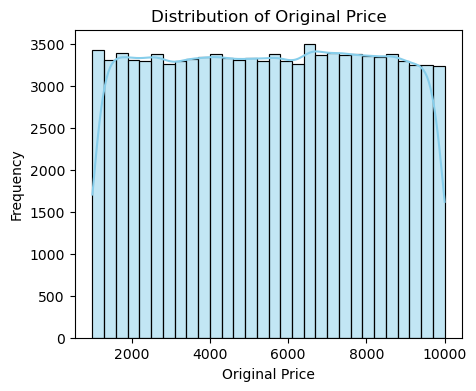

In [10]:
# Distribution of OriginalPrice
plt.figure(figsize=(5, 4))
sns.histplot(df['OriginalPrice'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Original Price')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.show()

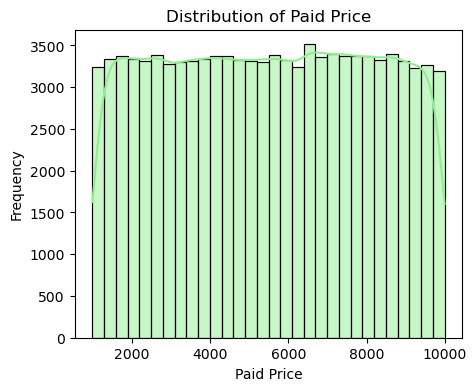

In [11]:
# Distribution of PaidPrice
plt.figure(figsize=(5, 4))
sns.histplot(df['PaidPrice'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Paid Price')
plt.xlabel('Paid Price')
plt.ylabel('Frequency')
plt.show()

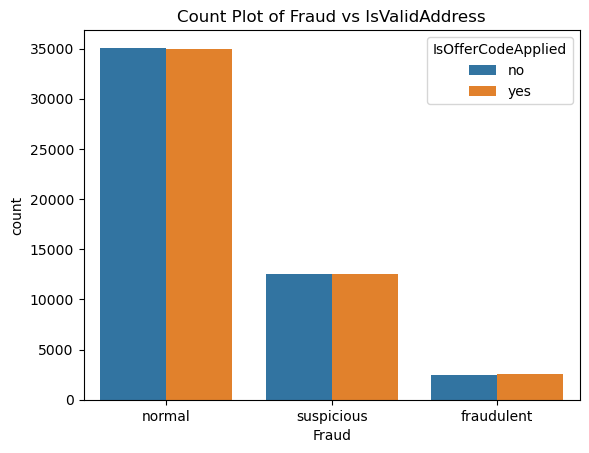

In [12]:
# Plot for churn vs gender
sns.countplot(x='Fraud', hue='IsOfferCodeApplied', data=df)
plt.title("Count Plot of Fraud vs IsValidAddress")
plt.show()

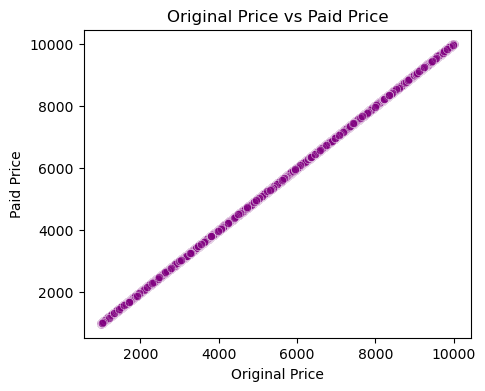

In [13]:
# Scatter Plot: OriginalPrice vs PaidPrice
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='OriginalPrice', y='PaidPrice', alpha=0.6, color='purple')
plt.title('Original Price vs Paid Price')
plt.xlabel('Original Price')
plt.ylabel('Paid Price')
plt.show()

In [14]:
# Add Discount Percentage Column
df['Discount%'] = ((df['OriginalPrice'] - df['PaidPrice']) / df['OriginalPrice']) * 100

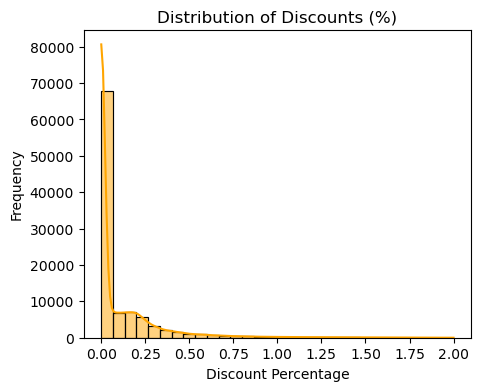

In [15]:
# Distribution of Discounts
plt.figure(figsize=(5, 4))
sns.histplot(df['Discount%'], kde=True, bins=30, color='orange')
plt.title('Distribution of Discounts (%)')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

### Feature Engineering

In [16]:
# Create 'OrderDateToDeliveryDate' feature: Days between Order Date and Delivery Date
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d/%m/%Y')
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'], format='%d/%m/%Y')
df['OrderDateToDeliveryDate'] = (df['DeliveryDate'] - df['OrderDate']).dt.days

# Create 'AddressChangeDuration' feature: Days between AddressChangeDate and Order Date
df['AddressChangeDate'] = pd.to_datetime(df['AddressChangeDate'], format='%d/%m/%Y')
df['AddressChangeDuration'] = (df['OrderDate'] - df['AddressChangeDate']).dt.days

# Fill negative or extreme outlier values (if any) for the new features
df['OrderDateToDeliveryDate'] = df['OrderDateToDeliveryDate'].apply(lambda x: max(x, 0))
df['AddressChangeDuration'] = df['AddressChangeDuration'].apply(lambda x: max(x, 0))

In [17]:
df

,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,AddressChangeDate,DeliveryDate,ReplacementDate,IsProductConsumable,IsOneTimeUseProduct,IsOfferCodeApplied,Fraud,Discount%,OrderDateToDeliveryDate,AddressChangeDuration
0,47019,41601,41601,yes,no,yes,yes,2711,2711,2019-01-25,2018-11-20,2019-01-28,01/02/2019,yes,no,no,normal,0.000000,3,66
1,20242,30352,30352,no,yes,no,no,2713,2710,2019-02-06,2019-02-03,2019-02-10,17/02/2019,yes,yes,no,normal,0.110579,4,3
2,79619,12328,12328,yes,no,yes,yes,4146,4142,2019-01-12,2018-07-30,2019-01-22,01/02/2019,yes,no,yes,suspicious,0.096479,10,166
3,80669,19203,19203,yes,no,yes,no,2709,2707,2019-03-27,2018-06-14,2019-04-03,06/04/2019,yes,no,yes,normal,0.073828,7,286
4,64577,19842,19842,no,no,no,yes,8815,8811,2019-01-17,2018-11-26,2019-01-21,28/01/2019,yes,no,yes,normal,0.045377,4,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22342,12520,12520,yes,yes,yes,yes,3970,3955,2019-01-01,2018-12-25,2019-01-07,12/01/2019,yes,no,yes,normal,0.377834,6,7
99996,38479,71580,71580,no,no,no,no,4890,4890,2019-03-10,2019-01-31,2019-03-20,29/03/2019,no,no,yes,normal,0.000000,10,38
99997,89234,66427,66427,yes,yes,yes,no,4965,4965,2019-02-06,2019-02-03,2019-02-13,17/02/2019,yes,yes,yes,normal,0.000000,7,3
99998,80288,27583,27583,no,yes,no,yes,1701,1690,2019-03-11,2019-03-14,2019-03-14,21/03/2019,yes,yes,no,normal,0.646678,3,0


In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# 1. Remove ID columns
df = df.drop(columns=['CustId', 'OrderId', 'ProductId'])

# 2. Apply Label Encoding for 'Fraud' column
label_encoder = LabelEncoder()
df['Fraud'] = label_encoder.fit_transform(df['Fraud'])

# 3. Identify categorical and numerical columns
categorical_columns = ['IsValidAddress', 'IsAddchangeRecently', 'IsAddchangeonDel', 
                       'IsDeliveryRejected', 'IsProductConsumable', 'IsOneTimeUseProduct', 
                       'IsOfferCodeApplied']

numerical_columns = ['OriginalPrice', 'PaidPrice', 'OrderDateToDeliveryDate', 
                     'AddressChangeDuration', 'Discount%']  

# 4. Apply One-Hot Encoding for categorical features and Standard Scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  
        ('num', StandardScaler(), numerical_columns)  
    ])

# Apply transformation
df_processed = pd.DataFrame(preprocessor.fit_transform(df))

# Optionally, set the column names for the new transformed DataFrame
# Get column names for one-hot encoded features
cat_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns)

# Combine categorical and numerical columns
all_columns = list(cat_columns) + numerical_columns

df_processed.columns = all_columns

# Add 'Fraud' column back after label encoding
df_processed['Fraud'] = df['Fraud']

# Display the transformed dataframe
df_processed.head()

,IsValidAddress_yes,IsAddchangeRecently_yes,IsAddchangeonDel_yes,IsDeliveryRejected_yes,IsProductConsumable_yes,IsOneTimeUseProduct_yes,IsOfferCodeApplied_yes,OriginalPrice,PaidPrice,OrderDateToDeliveryDate,AddressChangeDuration,Discount%,Fraud
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.071913,-1.070371,-1.532296,-0.845095,-0.486274,1
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.071142,-1.070757,-1.095251,-1.541037,0.039330,1
2,1.0,0.0,1.0,1.0,1.0,0.0,1.0,-0.518665,-0.518665,1.527016,0.259574,-0.027691,2
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-1.072684,-1.071914,0.215883,1.585178,-0.135354,1
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.281417,1.281416,-1.095251,-0.999749,-0.270586,1


## Feature Importance

In [19]:
# Separate features and target
X_rf = df_processed.drop(['Fraud'], axis = 1)  
y_rf = df_processed['Fraud']

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_rf, y_rf)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_rf.columns

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display features importance
print("Top Important Features:")
print(feature_importance_df)

# Select the top 10 important features
top_features = feature_importance_df['Feature'].tolist()
X_top = X_rf[top_features]


Top Important Features:
                    Feature  Importance
8                 PaidPrice    0.232072
7             OriginalPrice    0.231600
10    AddressChangeDuration    0.224421
11                Discount%    0.106793
9   OrderDateToDeliveryDate    0.078759
3    IsDeliveryRejected_yes    0.020817
4   IsProductConsumable_yes    0.019803
2      IsAddchangeonDel_yes    0.019377
6    IsOfferCodeApplied_yes    0.018843
5   IsOneTimeUseProduct_yes    0.018686
0        IsValidAddress_yes    0.015054
1   IsAddchangeRecently_yes    0.013773


### Over Sampling

In [20]:
from collections import Counter

# Separate features and target variable
X = df_processed.drop(columns=['Fraud'])  
y = df_processed['Fraud']                

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_resampled))

# Combine the resampled data back into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Fraud'] = y_resampled

# Display 
df_resampled.info()

Before SMOTE: Counter({1: 70000, 2: 25000, 0: 5000})
After SMOTE: Counter({1: 70000, 2: 70000, 0: 70000})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   IsValidAddress_yes       210000 non-null  float64
 1   IsAddchangeRecently_yes  210000 non-null  float64
 2   IsAddchangeonDel_yes     210000 non-null  float64
 3   IsDeliveryRejected_yes   210000 non-null  float64
 4   IsProductConsumable_yes  210000 non-null  float64
 5   IsOneTimeUseProduct_yes  210000 non-null  float64
 6   IsOfferCodeApplied_yes   210000 non-null  float64
 7   OriginalPrice            210000 non-null  float64
 8   PaidPrice                210000 non-null  float64
 9   OrderDateToDeliveryDate  210000 non-null  float64
 10  AddressChangeDuration    210000 non-null  float64
 11  Discount%                210000 non-null  float64
 12  Fraud   

In [21]:
# Check the duplicates
print(df_resampled.duplicated().sum())

# Drop the duplicates
df_resampled = df_resampled.drop_duplicates()

# Check again duplicates
print(df_resampled.duplicated().sum())

0
0


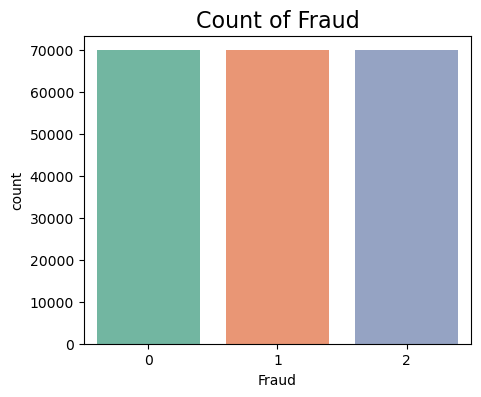

In [22]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Fraud', data=df_resampled, hue='Fraud', palette='Set2', legend=False)
plt.title('Count of Fraud', fontsize=16)
plt.show()

In [23]:
import os
# Create the data/processed directory if not exists
os.makedirs('../data/processed', exist_ok=True)

# Saving the Dataframe as a csv
df_resampled.to_csv('../data/processed/Fraud_prediction_AI.csv', index=False) 